In [1]:
!pip install selenium
!pip install beautifulsoup4

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from time import sleep
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [14]:
service=Service("./chromedriver.exe")
browser=webdriver.Chrome(service=service)
browser.get("https://play.google.com/store/apps/details?id=com.sh****.vn&hl=vi&gl=US") #open website
sleep(random.randint(3, 5))#
next_page=browser.find_element(By.XPATH,'//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[6]/div/span/span')
next_page.click() # click  [đọc tất cả các bài đánh giá] button

In [15]:
max_page=10 # number of pages to get data
page=0
while page<max_page:
    i=0
    while i<10:
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);') # scroll to find [hiện thêm] button
        sleep(random.randint(3,5 ))
        i+=1    
    else:
        more_page=browser.find_element(By.XPATH,'//*[@id="fcxH9b"]/div[4]/c-wiz[2]/div/div[2]/div/div/main/div/div[1]/div[2]/div[2]/div/span/span')
        more_page.click() #click [hiện thêm] button
        page+=1 
else:
    print('Done!')

Done!


In [16]:
with open('output.csv','w',encoding="utf-8") as file_output:
    headers=['user','time','star','comment']
    writer=csv.DictWriter(file_output,delimiter=',',lineterminator='\n',fieldnames=headers)
    writer.writeheader()
    page_source=BeautifulSoup(browser.page_source,"html.parser")
    users=page_source.find_all('span',class_="X43Kjb")
    times=page_source.find_all('span',class_="p2TkOb")
    comments=page_source.find_all('span',jsname="bN97Pc")
    votes=page_source.find_all('div',class_="pf5lIe")
    for i in np.arange(len(comments)):
        user=users[i].get_text()
        if user=='Sh****': #only take customer comments.
            user=users[i+1].get_text()
            print(user)
        else:
            user=users[i].get_text()
            print(user)
        time=times[i].get_text()
        print(time)
        vote=votes[i+1]
        stars=str(vote)
        star=stars[50:50+2]
        print(star)
        comment=comments[i].get_text()
        print(comment)
        writer.writerow({headers[0]: user ,headers[1]:time ,headers[2]:star,headers[3]:comment})
        print('\n')

Tân Trần Thanh
10 tháng 1, 2022
 1
Tẩy chay đơn vị vận chuyển shopee express nào đơn vị đó biến mất thì quay lại dùng. Mọi người sang app Lazada giao hàng cực nhanh


NPL
10 tháng 1, 2022
 1
Áp hay bị đơ mà cứ phải cập nhật suốt, không còn được chọn đơn vị vận chuyển nửa,chán. shipper không chịu giao hàng tự hủy đơn cũng chả biết làm sao


NPL
9 tháng 1, 2022
 1
Tôi ko thể sử dụng đc voucher gì cả. Cứ để đơn hàng ko đủ điều kiện:)? Ủa má ngta mua trên 100k là dư rồi ko đủ điều kiện là sao:)


6_Dân 8/9
9 tháng 1, 2022
 2
App cứ bị gì ý bị lag mà con chậm nx trong khi chuyển qua app khac thì bình thường , lúc săn sasef là đúng kỉu ức chế lun


6_Dân 8/9
8 tháng 1, 2022
 4
Tẩy chay đơn vị vận chuyển shopee express nào đơn vị đó biến mất thì quay lại dùng. Mọi người sang app Lazada giao hàng cực nhanh


Đằng Tử
8 tháng 1, 2022
 4
Áp hay bị đơ mà cứ phải cập nhật suốt, không còn được chọn đơn vị vận chuyển nửa,chán. shipper không chịu giao hàng tự hủy đơn cũng chả biết làm sao


Đằng Tử
9 

In [39]:
raw_data=pd.read_csv('output.csv')
raw_data.head()

,user,time,star,comment
0,Tân Trần Thanh,"10 tháng 1, 2022",1,Tẩy chay đơn vị vận chuyển Sh**** express nào ...
1,NPL,"10 tháng 1, 2022",1,"Áp hay bị đơ mà cứ phải cập nhật suốt, không c..."
2,NPL,"9 tháng 1, 2022",1,Tôi ko thể sử dụng đc voucher gì cả. Cứ để đơn...
3,6_Dân 8/9,"9 tháng 1, 2022",2,App cứ bị gì ý bị lag mà con chậm nx trong khi...
4,6_Dân 8/9,"8 tháng 1, 2022",4,Tẩy chay đơn vị vận chuyển Sh**** express nào ...


In [40]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     284 non-null    object
 1   time     284 non-null    object
 2   star     284 non-null    int64 
 3   comment  284 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.0+ KB


In [41]:
raw_data['time_str']=raw_data['time'].apply(lambda x: x.replace('tháng',',').replace(' ',''))
raw_data

,user,time,star,comment,time_str
0,Tân Trần Thanh,"10 tháng 1, 2022",1,Tẩy chay đơn vị vận chuyển Sh**** express nào ...,"10,1,2022"
1,NPL,"10 tháng 1, 2022",1,"Áp hay bị đơ mà cứ phải cập nhật suốt, không c...","10,1,2022"
2,NPL,"9 tháng 1, 2022",1,Tôi ko thể sử dụng đc voucher gì cả. Cứ để đơn...,"9,1,2022"
3,6_Dân 8/9,"9 tháng 1, 2022",2,App cứ bị gì ý bị lag mà con chậm nx trong khi...,"9,1,2022"
4,6_Dân 8/9,"8 tháng 1, 2022",4,Tẩy chay đơn vị vận chuyển Sh**** express nào ...,"8,1,2022"
...,...,...,...,...,...
279,Winnie Lê,"3 tháng 1, 2022",5,"Ứng dụng mua bán tốt, lợi cho người mua, tốt c...","3,1,2022"
280,Nguyễn Thị Thanh Mai,"2 tháng 1, 2022",1,"Phiên bản 2.81.30 chậm, đơ , lag, hay bị dừng ...","2,1,2022"
281,Huy Nhat,"2 tháng 1, 2022",5,Ứng dụng tốt .giá ok,"2,1,2022"
282,Huy Nhat,"3 tháng 1, 2022",1,Sh****: mua hàng yiên lợi và an toàn,"3,1,2022"


In [42]:
raw_data['time']=raw_data['time_str'].apply(lambda x: datetime.strptime(x, '%d,%m,%Y').date())
raw_data.sort_values(['time','star'],ascending=True).drop(columns=('time_str'))

,user,time,star,comment
55,Anh Vu,2019-07-18,5,Áp dụng mã người mới không đc. Tệ quá tệ🙂
119,Jg H,2020-07-17,4,"Giao hàng cực kì lâu, ĐVVC GIAO HÀNG NHANH mà ..."
97,Thảo Xuân,2020-10-15,5,Hãy cho thêm chế độ tối hoặc ban đêm
159,Xuan Nguyễn,2021-12-28,1,Quá lag tôi tải app khác cho nhanh
110,Minh Thu Huynh Ngoc,2021-12-29,3,"Phí ship quá cao, nên mua ở lazada. Độc quyền ..."
...,...,...,...,...
7,Tân Trần Thanh,2022-01-10,4,App cứ bị gì ý bị lag mà con chậm nx trong khi...
8,NPL,2022-01-10,4,Giao hàng siêu lâu đặt đơn shop và địa chỉ cùn...
58,Thu Ngô,2022-01-10,4,"Mua hàng thoải mái , tốt"
49,Hoàng Anh,2022-01-10,5,Giảm tí nữa ạ


In [96]:
data=raw_data.sort_values(['time','star'],ascending=True).drop(columns=('time_str'))[3:] # get most recent month's comments
data

,user,time,star,comment
159,Xuan Nguyễn,2021-12-28,1,Quá lag tôi tải app khác cho nhanh
110,Minh Thu Huynh Ngoc,2021-12-29,3,"Phí ship quá cao, nên mua ở lazada. Độc quyền ..."
69,quyết lường,2021-12-29,5,Hàng hoài ở kho mà không giao
121,Nga Hoang,2021-12-30,1,Rất thích. Mỗi tháng chi vài củ cho Sh****
210,Hải Tú,2021-12-30,1,toi rat thich ung dung nay
...,...,...,...,...
7,Tân Trần Thanh,2022-01-10,4,App cứ bị gì ý bị lag mà con chậm nx trong khi...
8,NPL,2022-01-10,4,Giao hàng siêu lâu đặt đơn shop và địa chỉ cùn...
58,Thu Ngô,2022-01-10,4,"Mua hàng thoải mái , tốt"
49,Hoàng Anh,2022-01-10,5,Giảm tí nữa ạ


In [44]:
group_data=data.groupby('star').agg(countstar=('star','count'))
group_data

,countstar
star,
1,85
2,22
3,29
4,26
5,119


In [45]:
group_data['pro_star']=group_data['countstar']/group_data['countstar'].sum()
group_data=group_data.reset_index()
group_data

,star,countstar,pro_star
0,1,85,0.302491
1,2,22,0.078292
2,3,29,0.103203
3,4,26,0.092527
4,5,119,0.423488


Text(0.5, 1.0, 'Vote star Proportions')

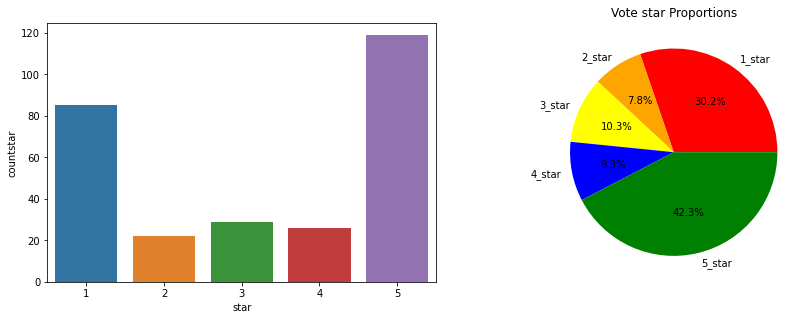

In [46]:
plt.axes([0,1,0.9,0.9])
sns.barplot(x="star", y="countstar", data=group_data)
plt.axes([1,1,0.9,0.9])
plt.pie(group_data['pro_star'],
        labels = ['1_star', '2_star', '3_star', '4_star','5_star'],
        autopct = '%1.1f%%', 
        colors = ('r','orange','yellow','b','g'),normalize=False)
plt.title('Vote star Proportions')

In [49]:
vote_by_day=data.groupby(['time','star']).agg(countstar=('star', 'count')).reset_index().pivot(index='time', columns='star').fillna(0)
vote_by_day

countstar                     
star               1    2    3    4     5
time                                     
2021-12-28       1.0  0.0  0.0  0.0   0.0
2021-12-29       0.0  0.0  1.0  0.0   1.0
2021-12-30       2.0  1.0  0.0  1.0   3.0
2021-12-31       4.0  1.0  2.0  1.0   4.0
2022-01-01       4.0  1.0  2.0  1.0  16.0
2022-01-02       5.0  2.0  4.0  2.0  12.0
2022-01-03      12.0  3.0  1.0  0.0  12.0
2022-01-04       5.0  2.0  1.0  4.0   9.0
2022-01-05       5.0  0.0  3.0  2.0  10.0
2022-01-06       9.0  2.0  3.0  0.0  21.0
2022-01-07       3.0  0.0  2.0  0.0   9.0
2022-01-08      14.0  4.0  3.0  6.0  11.0
2022-01-09      14.0  6.0  7.0  6.0   9.0
2022-01-10       7.0  0.0  0.0  3.0   2.0

In [50]:
data_by_day=data.groupby(['time']).agg(countstar=('star', 'count'),meanstar=('star','mean')).reset_index()
data_by_day

,time,countstar,meanstar
0,2021-12-28,1,1.000000
1,2021-12-29,2,4.000000
2,2021-12-30,7,3.285714
3,2021-12-31,12,3.000000
4,2022-01-01,24,4.000000
5,2022-01-02,25,3.560000
6,2022-01-03,28,2.892857
7,2022-01-04,21,3.476190
8,2022-01-05,20,3.600000
9,2022-01-06,35,3.628571


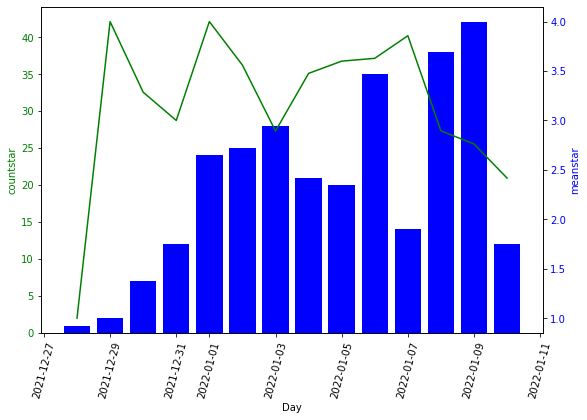

In [95]:
fig,ax1=plt.subplots(1,1,figsize=(9,6))
plt.xticks( rotation=75)

ax1.bar(data_by_day['time'],data_by_day['countstar'] , color = 'b')

ax2=ax1.twinx()
ax2.plot(data_by_day['time'],data_by_day['meanstar'], color = 'green')

ax1.set_xlabel('Day')
ax1.set_ylabel('countstar',color = 'green')

ax2.set_ylabel('meanstar',color = 'b')
ax2.tick_params(axis='y',labelcolor='b')
ax1.tick_params(axis='y',labelcolor='green')
